##laptop_price_prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import joblib

import warnings

warnings.filterwarnings('ignore')

In [5]:
laptop_data = pd.read_csv('/content/drive/MyDrive/Project/Group Project/Dataset/laptopData.csv')
data= laptop_data.copy()

In [6]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [8]:
data.shape

(1303, 12)

In [9]:
data.size

15636

In [10]:
data.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [11]:
data.nunique()

Unnamed: 0          1273
Company               19
TypeName               6
Inches                25
ScreenResolution      40
Cpu                  118
Ram                   10
Memory                40
Gpu                  110
OpSys                  9
Weight               189
Price                777
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [13]:
# find missing values
data.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [14]:
# remove unnecessary features
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
# value count of Companies
data['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [16]:
for i in data.columns:
  print(data[i].unique(),':-',i)
  print('**'*20)

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG'] :- Company
****************************************
['Ultrabook' 'Notebook' nan 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook'] :- TypeName
****************************************
['13.3' '15.6' '15.4' '14' '12' nan '17.3' '13.5' '12.5' '13' '18.4'
 '13.9' '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17'
 '15' '14.1' '11.3' '10.1'] :- Inches
****************************************
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080' nan
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 384

In [17]:
for i in data.columns:
  print(data[i].value_counts(),':-',i)
  print('**'*20)

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64 :- Company
****************************************
TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64 :- TypeName
****************************************
Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64 :- Inches
****

## DATA VISUALIZATION

In [18]:
# setting graph format
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['lines.linewidth'] = 2

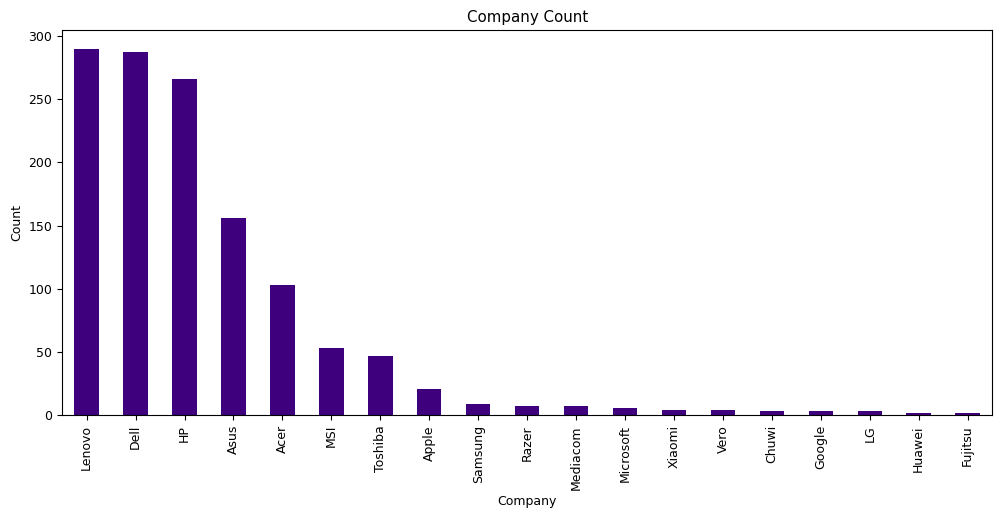

In [19]:
# Barplot on Company
data['Company'].value_counts().plot(kind = 'bar', cmap= 'Purples_r')
plt.title('Company Count')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

Dell and Lenovo has most number of Laptops

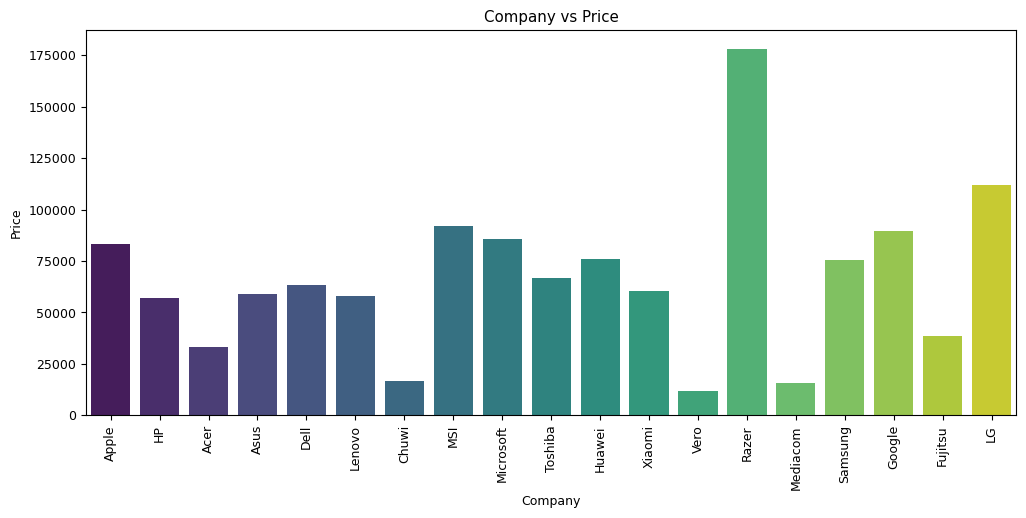

In [20]:
# Company vs Price
sns.barplot(x=data['Company'],
            y= data['Price'],
            errorbar=('ci', False),
            palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Company vs Price')
plt.show()

Razer has the most expensive laptop

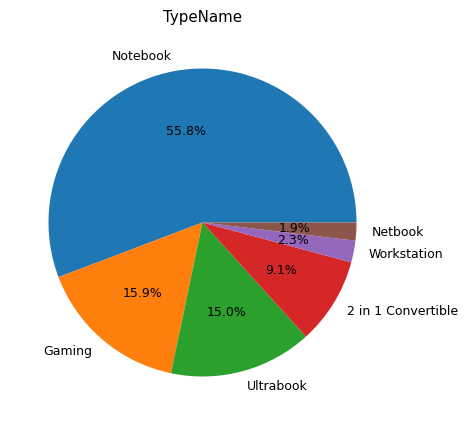

In [21]:
plt.pie(data['TypeName'].value_counts(),
        labels=data['TypeName'].value_counts().index,
        autopct='%1.1f%%')
plt.title('TypeName')
plt.show()

Most of the Laptops are Notebook type

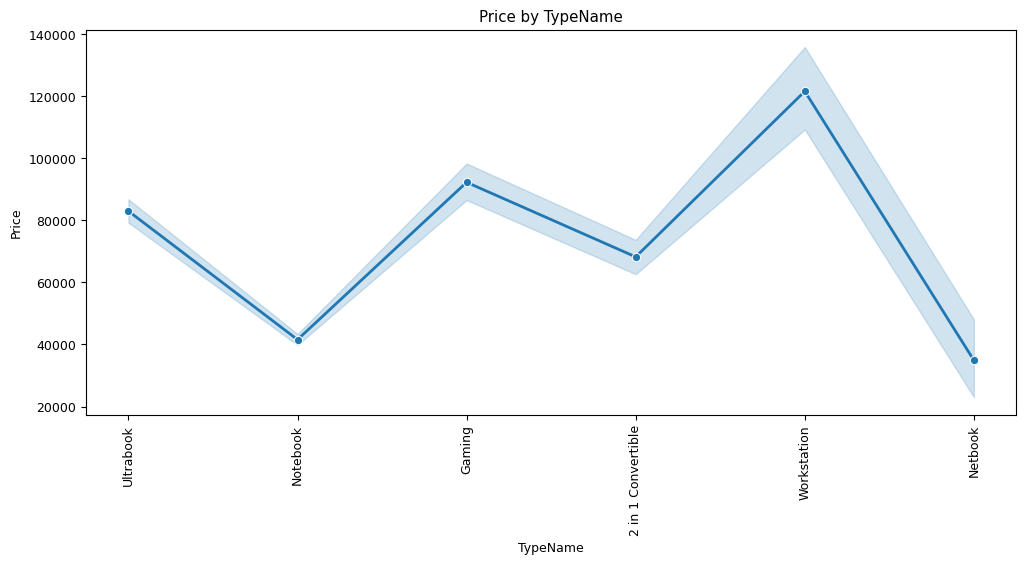

In [22]:
# TypeName vs Price
sns.lineplot(x=data['TypeName'],
             y=data['Price'],
             marker='o')
plt.title('Price by TypeName')
plt.xticks(rotation='vertical')
plt.show()

Workstation has the most expensive laptops

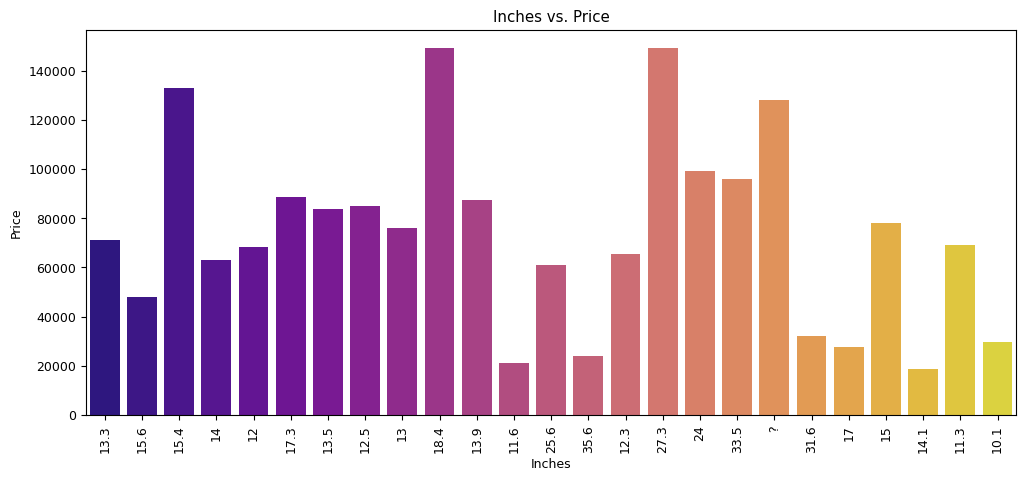

In [23]:
# Inches vs price
sns.barplot(data=data,
                x='Inches',
                y='Price',
                errorbar=('ci', False),
                palette='plasma')
plt.title('Inches vs. Price')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Laptops of inch 18.4 has the highest price

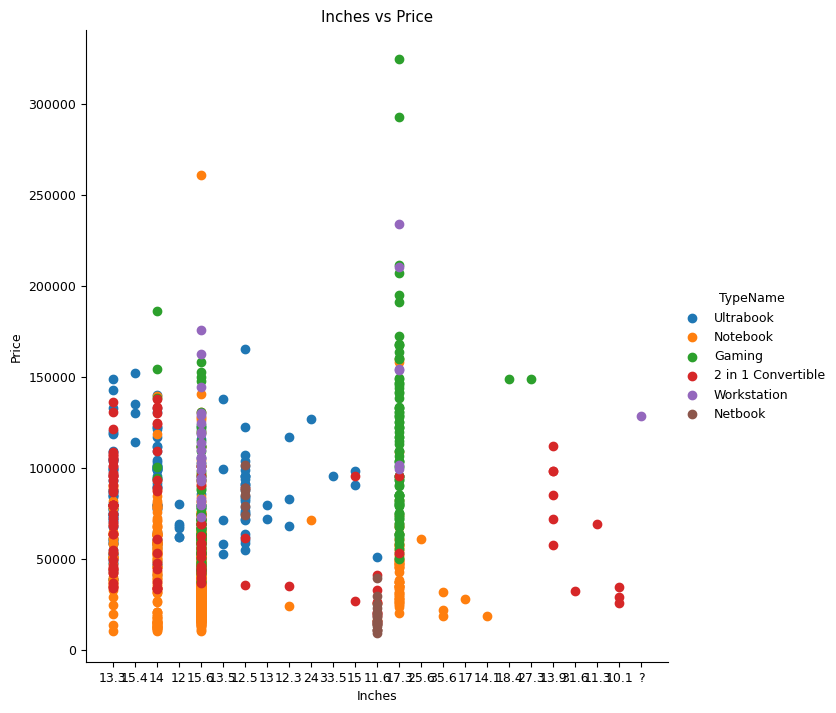

In [24]:
sns.FacetGrid(data, hue='TypeName', height=7).map(plt.scatter, 'Inches', 'Price').add_legend()
plt.title('Inches vs Price')
plt.show()

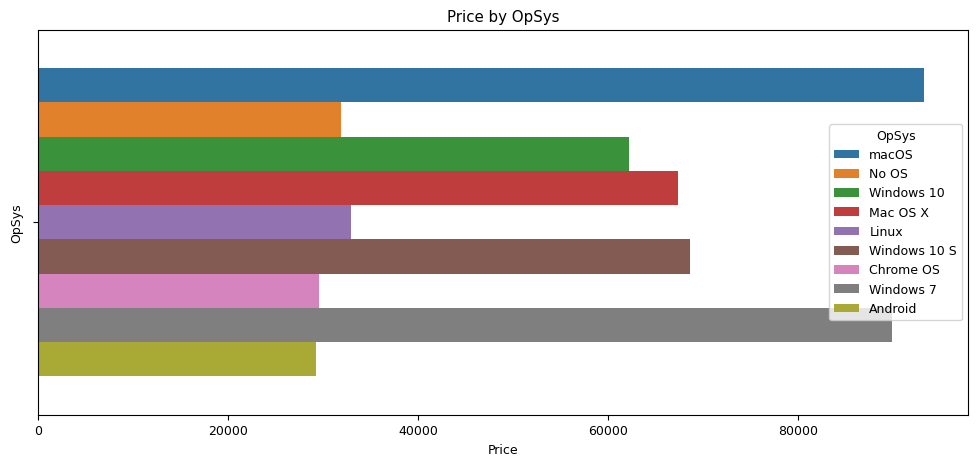

In [25]:
sns.barplot(data=data,
            x='Price',
            hue='OpSys',
            errorbar=('ci', False))
plt.title('Price by OpSys')
plt.xlabel('Price')
plt.ylabel('OpSys')
plt.show()

Macos and Windows 7 has maximum price

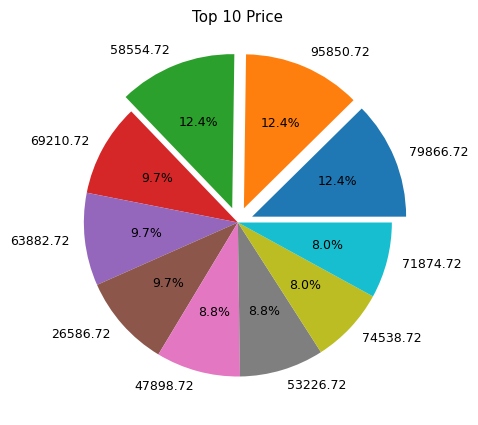

In [26]:
# Top 10 Price range
explode = [0.1,0.1,0.1,0,0,0,0,0,0,0]
data['Price'].value_counts()
top10_price = data['Price'].value_counts().head(10)
plt.pie(top10_price,
        labels=top10_price.index,
        explode=explode,
        autopct='%1.1f%%')
plt.title('Top 10 Price')
plt.show()

Here we know top 3 common price range on laptops

## FEATURE ENGINEERING

In [27]:
data['Weight'] = data['Weight'].str.replace('kg','')
data.loc[data.Weight=='?','Weight']=np.NaN
data.loc[data.Inches=='?','Inches']=np.NaN
data['Weight'] = data['Weight'].astype(float)
data['Inches'] = data['Inches'].astype(float)

data['Ram'] = data['Ram'].str.replace('GB','')
data['Ram'] = data['Ram'].astype(float)

In [28]:
data = data.dropna()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   ScreenResolution  1271 non-null   object 
 4   Cpu               1271 non-null   object 
 5   Ram               1271 non-null   float64
 6   Memory            1271 non-null   object 
 7   Gpu               1271 non-null   object 
 8   OpSys             1271 non-null   object 
 9   Weight            1271 non-null   float64
 10  Price             1271 non-null   float64
dtypes: float64(4), object(7)
memory usage: 119.2+ KB


In [30]:
data.isnull().any()

Company             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price               False
dtype: bool

**Touch Screen Column**

In [31]:
# 0 - not Touch Screen, 1 - Touch Screen
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x :1 if 'Touchscreen' in x else 0)
data['TouchScreen'].value_counts()

TouchScreen
0    1086
1     185
Name: count, dtype: int64

**IPS Panel column**

In [32]:
# 1 - For IPS Display, 0 - Not IPS Display
data['IPS Panel'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)
data['IPS Panel'].value_counts()

IPS Panel
0    912
1    359
Name: count, dtype: int64

**HD Column**

In [33]:
def categorize_resolution(resolution):
    if 'Full HD' in resolution:
        return 'Full HD'
    elif 'Quad HD+' in resolution:
        return 'Quad HD+'
    elif '4K Ultra HD' in resolution:
        return '4K Ultra HD'
    else:
        return 0

In [34]:
data['HD'] = data['ScreenResolution'].apply(categorize_resolution)
data['HD'].value_counts()

HD
Full HD        822
0              378
4K Ultra HD     42
Quad HD+        29
Name: count, dtype: int64

**Pixel Per Inches Column**

In [35]:
data['ScreenResolution'] = data['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
data['ScreenWidth'] = data['ScreenResolution'].str.split('x').apply(lambda x:x[0]).astype(float)
data['ScreenHeight'] = data['ScreenResolution'].str.split('x').apply(lambda x:x[1]).astype(float)

In [36]:
data['PPI'] = (((data['ScreenWidth']**2) + (data['ScreenHeight']**2))**0.5/data['Inches']).astype('float')

**CPU Brand column**

In [37]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [38]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' or text =='Samsung Cortex A72&A53':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [39]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)

**GPU Brand column**

In [42]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [43]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data['Gpu brand'].value_counts()

Gpu brand
Intel     702
Nvidia    392
AMD       176
ARM         1
Name: count, dtype: int64

Remove unnecessary columns

In [45]:
data.drop(['ScreenResolution', 'Cpu','Memory', 'Gpu','ScreenWidth', 'ScreenHeight','First', 'Second','Cpu Name'], axis=1, inplace=True)

In [46]:
# encoding
categorical_features = ['Company', 'TypeName', 'OpSys', 'HD', 'Cpu brand', 'Gpu brand']
data = pd.get_dummies(data, columns=categorical_features).astype(int)

In [47]:
# select features that are greater than the threshold
cor_target = abs(data.corr()['Price'])
relevant_features = cor_target[cor_target>0.1].index
correlated_data = data[relevant_features]
correlated_data.head()

,Ram,Weight,Price,TouchScreen,IPS Panel,PPI,Company_Acer,Company_MSI,Company_Razer,TypeName_Gaming,...,HD_Full HD,HD_Quad HD+,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1,71378,0,1,226,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,8,1,47895,0,0,127,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,8,1,30636,0,0,141,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,16,1,135195,0,1,220,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8,1,96095,0,1,226,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## MODEL CREATION

In [50]:
# split features and target
x = correlated_data.drop('Price', axis=1)
y = correlated_data['Price']

In [51]:
# train test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [52]:
# create pipelines using tuples
pipeline_lr = Pipeline([
    ('lr_regressor', LinearRegression())
])

pipeline_dt = Pipeline([
    ('dt_regressor', DecisionTreeRegressor())
])

pipeline_rf = Pipeline([
    ('rf_regressor', RandomForestRegressor())
])

In [53]:
# list of pipeline
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

# fit pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [54]:
# dictionary of pipelines and classifiers
pipe_dictionary = {0:'LinearRegression', 1:'DecisionTreeRegressor', 2:'RandomForestRegressor'}

# perfomace evaluation
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dictionary[i], model.score(x_test, y_test)))

LinearRegression Test Accuracy: 0.7575808930439166
DecisionTreeRegressor Test Accuracy: 0.7744411717516517
RandomForestRegressor Test Accuracy: 0.8113598284356662


In [55]:
for i, model in enumerate(pipelines):
  if model.score(x_test,y_test) > 0.0:
    best_score = model.score(x_test,y_test)
    best_model = model
    best_regressor = i
print('The best model for regression is: {}'.format(pipe_dictionary[best_regressor]))

The best model for regression is: RandomForestRegressor


The best Regressor model is RandomForest Regressor which gives good score

In [56]:
# Hyperparametric tuning
randomforest = RandomForestRegressor()
param = {
    'n_estimators': [10, 50, 100],
    'bootstrap':[True, False],
    'random_state':[0, 1, 42]
}

In [57]:
gd = GridSearchCV(randomforest, param, cv=10, scoring='r2')
gd.fit(x_train, y_train)
print("Best Parameters:", gd.best_params_)

Best Parameters: {'bootstrap': True, 'n_estimators': 100, 'random_state': 1}


In [58]:
model_creation = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=1)
model_creation.fit(x_train, y_train)
y_predict = model_creation.predict(x_test)

PERFOMACE EVALUATION

In [59]:
print('R2 score: ', r2_score(y_test, y_predict))

R2 score:  0.8189632170530036


SAVE MODEL

In [60]:
joblib.dump(model_creation, 'laptop_price_model')

['laptop_price_model']